## Data Exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
df.shape

(45593, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

The data is a mixture of different data types including floats,integers and objects. Our targer is the variable 'Time_taken(min)'. Now we need to see whether there are null values for any feature.


In [6]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

Since there is no null values we can look into the essential features needed for our target ie. delivery time.
There are 20 columns or features for the data.

In [7]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


Here is a description of the numerical data in the data frame..But we need the data for the non numerical values as well like age, rating etc..

In [8]:
import numpy as np

In [9]:
df_describe_non_numeric = df.describe(include=['object']).T
df_describe_non_numeric

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


Here's what each of the descriptors means:

**count**: The number of non-null values in the column.<br> 
**unique**: The number of distinct unique values in the column.<br> 
**top**: The most frequently occurring value in the column.<br> 
**freq**: The frequency/count of the most frequently occurring value.

#### Observations
Even though there is no null values there are NAN(not a number) values present. So we need to clean the data.

## Data Cleaning
Data cleaning is a crucial process involving the identification and rectification of errors, inconsistencies, and missing values within a dataset.<br>
During this step, we will focus on formatting column names, adjusting column values, updating data types, dropping unnecessary columns, handling missing values, and checking for any duplicate data. By addressing these aspects, we can enhance the overall quality and reliability of the dataset.<br>

Now lets analyse each of the features individually

In [10]:
df = df.drop('ID',axis=1)

In [11]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


Since 'ID' is not an imp feature we removed it and now let's look at the 'Delivery_person_ID' which actually contains the city of residence of the customer which is a valuable feature.<br>
So we will extract the city name and create a new column.
### Data Extraction

In [12]:
df['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]
df.head(3)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,INDO
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,BANG
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,BANG


"str.split("RES", expand=True)" method is to split the values in the 'Delivery_person_ID' column at the string "RES" and then taking the first part (index 0) of the split.<br>
When expand=True, the split elements are expanded into separate columns, and a DataFrame is returned.<br>
When expand=False (or not specified), a Series of lists is returned.

In [13]:
df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))

In [14]:
df[['Time_taken(min)','City_code']].head()

,Time_taken(min),City_code
0,24,INDO
1,33,BANG
2,26,BANG
3,21,COIMB
4,30,CHEN


This is the modified columns where we turned time taken to int and removed the unnecessary prefix 'min'.

### Update Data Types
As we know several features which are numerical is given in object dtypes, to get useful insights from them we need to convert it into float or int values.

In [15]:
#Update datatypes
def update_datatype(df):
    #Update datatype from object to float
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    #Update datatype from object to datetime
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")
    
update_datatype(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           45593 non-null  object        
 1   Delivery_person_Age          43739 non-null  float64       
 2   Delivery_person_Ratings      43685 non-null  float64       
 3   Restaurant_latitude          45593 non-null  float64       
 4   Restaurant_longitude         45593 non-null  float64       
 5   Delivery_location_latitude   45593 non-null  float64       
 6   Delivery_location_longitude  45593 non-null  float64       
 7   Order_Date                   45593 non-null  datetime64[ns]
 8   Time_Orderd                  45593 non-null  object        
 9   Time_Order_picked            45593 non-null  object        
 10  Weatherconditions            45593 non-null  object        
 11  Road_traffic_density         45593 non-nu

In [17]:
df = df.drop('Delivery_person_ID',axis=1)

### Duplicates values checking

In a DataFrame (df), duplicate values refer to rows that have identical values across all columns.If duplicates are found, we will need to remove them to maintain the integrity of the data.

In [18]:
#Check for Duplicate Values
if (len(df[df.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


### Handle Missing Values
Since we already know the df have NAN values we need to find which features has this null values and eliminate or replace it for the accuracy of the model.<br>
As part of this process, we will convert NaN strings to np.nan and then calculate and print the count of missing values for each feature.

In [19]:
#Replace NaN to np.nan
df.replace('NaN', float(np.nan), regex=True,inplace=True)
#Show count of NaN values in data
df.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weatherconditions               616
Road_traffic_density            601
Festival                        228
Order_Date                        0
Delivery_location_longitude       0
Time_Order_picked                 0
Delivery_location_latitude        0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
City_code                         0
dtype: int64

Given the presence of NaN values in multiple columns, visualizing these columns would be beneficial for identifying patterns and determining the optimal approach to handle null values for each feature.
### Data Visualization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filter out a specific warning
warnings.filterwarnings("ignore")

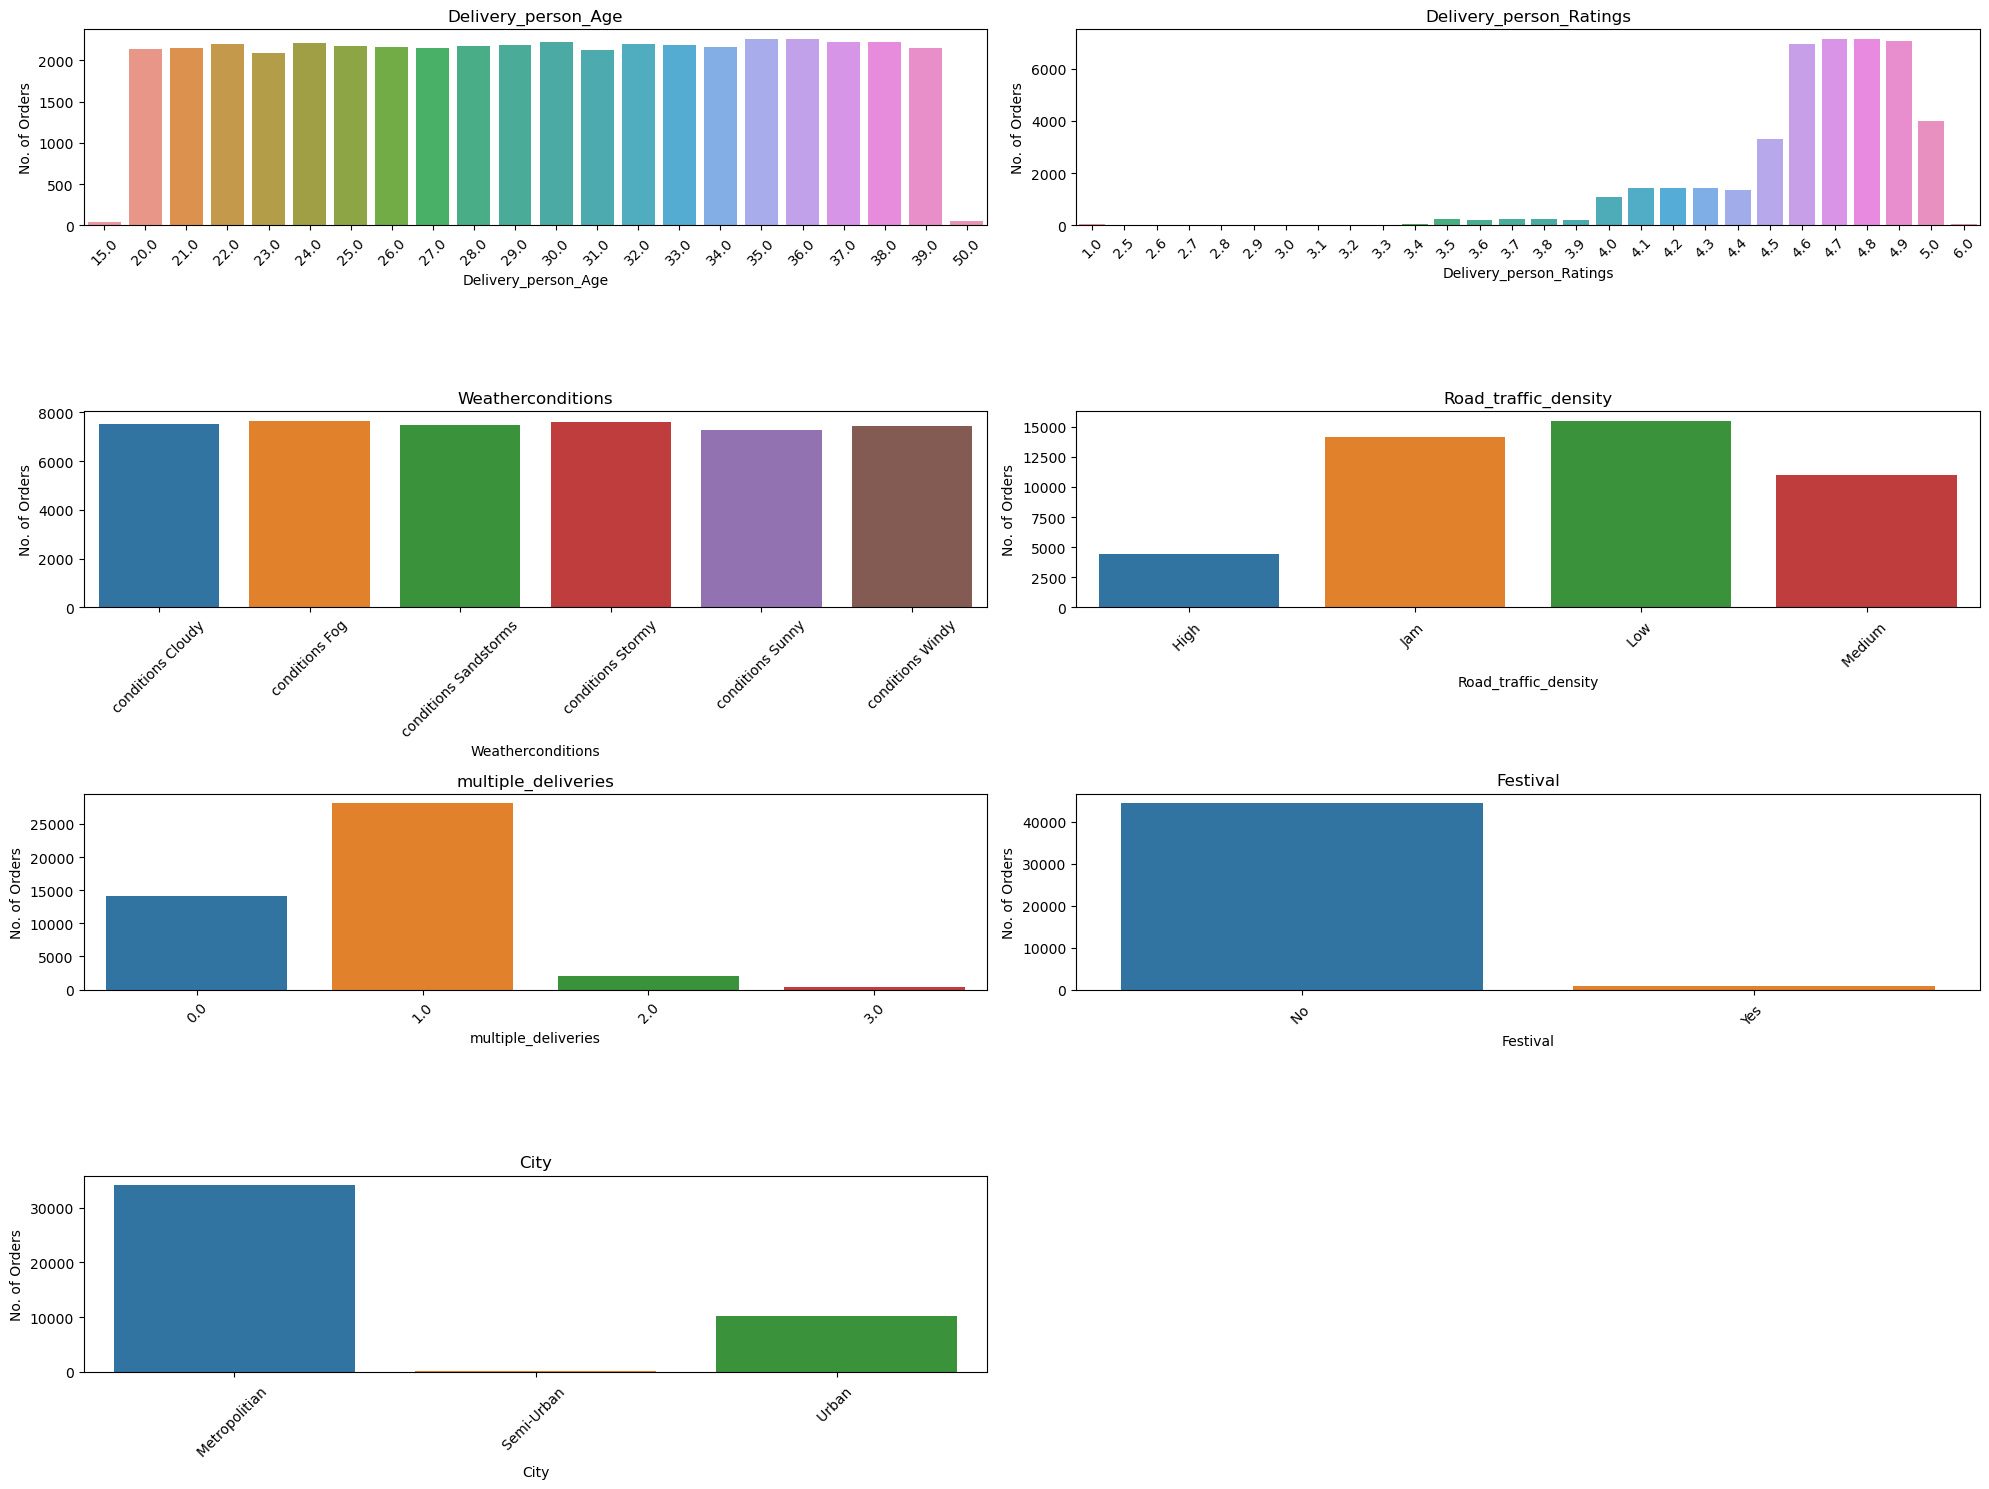

In [21]:
#Data Visualisation
cols = ['Delivery_person_Age','Delivery_person_Ratings','Weatherconditions','Road_traffic_density','multiple_deliveries','Festival','City']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)
    
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

1. For **Delivery_person_Age** and **Weatherconditions**, which display nearly uniform distributions, the missing values will be filled randomly.<br>

2. As for **Delivery_person_Ratings**, which exhibits a left-skewed distribution, the missing values will be filled with the median.<br>

3. For the remaining categorical columns, the missing values will be filled with the mode, representing the most frequently occurring value in each respective column.<br>
These approaches will help ensure that missing values are appropriately handled based on the characteristics of each column.

In [22]:
#Handle null values
def handle_null_values(df):
    df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']), inplace=True)
    df['Weatherconditions'].fillna(np.random.choice(df['Weatherconditions']), inplace=True)
    df['City'].fillna(df['City'].mode()[0], inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)
    
handle_null_values(df)
df.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
dtype: int64

We will handle the time variable which has null values in the next section.

## Feature Engineering
Let’s begin by generating new features based on the Order Date.

In [23]:
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df)

In [24]:
df.head(5)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          45593 non-null  float64       
 1   Delivery_person_Ratings      45593 non-null  float64       
 2   Restaurant_latitude          45593 non-null  float64       
 3   Restaurant_longitude         45593 non-null  float64       
 4   Delivery_location_latitude   45593 non-null  float64       
 5   Delivery_location_longitude  45593 non-null  float64       
 6   Order_Date                   45593 non-null  datetime64[ns]
 7   Time_Orderd                  43862 non-null  object        
 8   Time_Order_picked            45593 non-null  object        
 9   Weatherconditions            45593 non-null  object        
 10  Road_traffic_density         45593 non-null  object        
 11  Vehicle_condition            45593 non-nu

Next, we’ll create a new feature that highlights the difference between the order time and the pickup time. As part of this step, we will drop all the time and date-related features, as we have already extracted the necessary information from them, which can be utilized in our machine learning model.

In [26]:
import pandas as pd
import numpy as np

def calculate_time_diff(df):
    # Convert 'Time_Orderd' and 'Time_Order_picked' to datetime
    df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'])
    
    # Calculate the time difference directly
    df['order_prepare_time'] = (df['Time_Order_picked'] - df['Time_Orderd']).dt.total_seconds() / 60
    
    # Handle null values by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)
    
    # Drop all the time columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Order_Date'], axis=1, inplace=True)

# Assuming df is your DataFrame
calculate_time_diff(df)
df.head()



,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,conditions Sunny,High,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,2,Snack,...,2022,4,0,0,0,0,0,0,0,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,0,Drinks,...,2022,5,0,0,0,0,0,0,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,conditions Sunny,Medium,0,Buffet,...,2022,1,0,0,0,0,0,0,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,conditions Cloudy,High,1,Snack,...,2022,5,0,0,0,0,0,0,1,15.0


Next, we will calculate the distance between the restaurant location and the delivery location and create a new feature called **distance**

In [27]:
from geopy.distance import geodesic

In [28]:
#Calculate distance between restaurant location & delivery location
def calculate_distance(df):
    df['distance']=np.zeros(len(df))
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance']= df['distance'].astype("str").str.extract('(\d+)').astype("int64")
    
calculate_distance(df)

In [29]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,conditions Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,conditions Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,conditions Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6


## Data Preprocessing

Categorical feature encoding is essential in machine learning to transform categorical values into numerical representations. Many machine learning models are designed to handle numerical data, so converting categorical variables allows us to leverage these models effectively. There are various methods available for categorical variable encoding, including One Hot Encoding and Label Encoding.<br>

In this specific scenario, Label Encoding is being used due to the presence of multiple features with categorical values. Label Encoding assigns a unique numerical label to each category within a feature. One Hot Encoding is an alternative approach, but it can result in a high-dimensional representation.

In [30]:
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [31]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df)

In [32]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,...,5,0,0,0,0,0,0,1,15.0,6


### Split Training & Testing Data

Let’s split the data into train & test datasets. This will help us in evaluating the performance of a machine learning model on unseen data.

In [33]:
X = df.drop('Time_taken(min)', axis=1)  # Features
y = df['Time_taken(min)']  # Target variable


In [34]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardisation

To address the issue of varying scales in the food delivery dataset, we will perform Standardization. This process involves transforming the features to have a zero mean and a unit standard deviation. By doing so, we ensure that no single feature dominates the learning process and enable a fair comparison among the features. Standardization facilitates faster convergence and enhances the overall performance of the machine learning model.

In [35]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

## Model Building
In this step, we will train a machine learning model to predict the food delivery time, which falls under the domain of regression problems since we aim to predict a numerical value. We have a variety of regression algorithms which we can use to build the model, such as Linear Regression, Decision Tree, Random Forest, and XGBoost.

To determine the most suitable algorithm for our data, we can use GridSearchCV. By utilizing this technique, we can explore and identify the algorithm that best fits our model. Additionally, we can fine-tune the hyperparameters to obtain optimal results. GridSearchCV enables us to systematically search through various combinations of algorithms and hyperparameters to determine the best configuration for our specific problem.

In [36]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {},  
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [100, 200, 300]},
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best R2 score: 0.4219950294790234

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.7170530669637409

RandomForestRegressor:
Best parameters: {'n_estimators': 300}
Best R2 score: 0.811751029667867

XGBRegressor:
Best parameters: {'max_depth': 7, 'n_estimators': 25}
Best R2 score: 0.820865686546222



Based on our evaluation, XGBoost emerges as the top-performing algorithm for the food delivery data, with the optimal hyperparameters being n_estimators set to 20 and max_depth set to 9. With this knowledge in hand, we can proceed to train the food delivery data using the XGBoost model and the identified hyperparameters, thereby leveraging its superior performance for our specific task.

In [37]:
# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=20,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluate Model
To assess the model’s performance, we will use the R2 score metric. The R2 score indicates the extent to which our model comprehends the relationship between the input features and the target variable. A higher R2 score signifies a better-performing model, indicating that it can capture and explain a larger proportion of the variance in the target variable based on the provided features.

In [38]:
# Make predictions on the test data
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 3.16
Mean Squared Error (MSE): 15.87
Root Mean Squared Error (RMSE): 3.98
R-squared (R2) Score: 0.82


### Conclusion

In summary, the food delivery prediction model was successfully built using XGBoost, resulting in an R2 score of 0.82. The development process encompassed essential steps such as data cleaning, feature engineering, Label Encoding, and Standardization to ensure the data was appropriately prepared. We further conducted a thorough comparison of various regression algorithms using Cross Validation to identify the best model for the food delivery dataset.

Moving forward, there are potential avenues for enhancement. These include performing feature selection techniques to identify the most influential features, exploring additional feature engineering methods to uncover valuable insights, and experimenting with alternative optimization techniques. By fine-tuning the model through these steps, we can enhance its performance and accuracy, leading to more accurate predictions of food delivery timings.